# Problem 2 Sample Code

This sample code is meant as a guide on how to use PyTorch and how to use the relevant model layers. This not a guide on how to design a network and the network in this example is intentionally designed to have poor performace.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

## Loading MNIST
The `torchvision` module contains links to many standard datasets. We can load the MNIST dataset into a `Dataset` object as follows:

In [34]:
train_dataset = datasets.MNIST('./data', train=True, download=True,  # Downloads into a directory ../data
                               transform=transforms.ToTensor())
test_dataset = datasets.MNIST('./data', train=False, download=False,  # No need to download again
                              transform=transforms.ToTensor())

The `Dataset` object is an iterable where each element is a tuple of (input `Tensor`, target):

In [35]:
print(len(train_dataset), type(train_dataset[0][0]), type(train_dataset[0][1]))

60000 <class 'torch.Tensor'> <class 'int'>


We can convert images to numpy arrays and plot them with matplotlib:

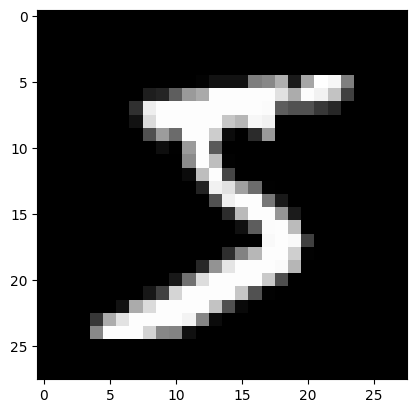

In [36]:
plt.imshow(train_dataset[0][0][0].numpy(), cmap='gray')

## Network Definition
Let's instantiate a model and take a look at the layers.

In [37]:
model = nn.Sequential(
    # In problem 2, we don't use the 2D structure of an image at all. Our network
    # takes in a flat vector of the pixel values as input.
    nn.Flatten(),  
    nn.Linear(784, 20),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(20, 10)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=20, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=20, out_features=10, bias=True)
)


## Training
We also choose an optimizer and a loss function.

In [38]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

We could write our training procedure manually and directly index the `Dataset` objects, but the `DataLoader` object conveniently creates an iterable for automatically creating random minibatches:

In [39]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True) 

We now write our backpropagation loop, training for 10 epochs.

In [40]:
# Some layers, such as Dropout, behave differently during training
model.train()

for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()
        
        # Weight update
        optimizer.step()

    # Track loss each epoch
    print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

Train Epoch: 1  Loss: 0.8290
Train Epoch: 2  Loss: 0.3513
Train Epoch: 3  Loss: 0.7637
Train Epoch: 4  Loss: 0.4789
Train Epoch: 5  Loss: 1.1462
Train Epoch: 6  Loss: 0.3954
Train Epoch: 7  Loss: 0.8138
Train Epoch: 8  Loss: 0.4605
Train Epoch: 9  Loss: 0.3058
Train Epoch: 10  Loss: 0.4393


## Testing
We can perform forward passes through the network without saving gradients.

In [41]:
# Putting layers like Dropout into evaluation mode
model.eval()

test_loss = 0
correct = 0

# Turning off automatic differentiation
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0078, Accuracy: 9305/10000 (93.0500)


In [42]:

# Define the network
#    - We flatten 28x28 inputs to vectors of size 784.
#    - We use up to ~100 hidden units in total (here, two layers of 50).
#    - The final layer outputs 10 logits (one per digit).
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 50),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(50, 10)
)

#  Choose an optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=1e-3) 
criterion = nn.CrossEntropyLoss()

#  Training loop (simplified)
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backprop + optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f"Epoch {epoch+1}: Test Accuracy = {accuracy:.3f}")



Epoch 1: Test Accuracy = 0.942
Epoch 2: Test Accuracy = 0.956
Epoch 3: Test Accuracy = 0.959
Epoch 4: Test Accuracy = 0.963
Epoch 5: Test Accuracy = 0.963
Epoch 6: Test Accuracy = 0.966
Epoch 7: Test Accuracy = 0.966
Epoch 8: Test Accuracy = 0.968
Epoch 9: Test Accuracy = 0.968
Epoch 10: Test Accuracy = 0.971


In [43]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(100, 10)
)

# Use cross‐entropy loss (which includes the softmax) and Adam optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 15
for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    # Evaluate on the test set after each epoch
    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            test_loss += criterion(outputs, labels).item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    print(f"Epoch {epoch+1} | "
          f"Test Loss = {test_loss/len(test_loader):.4f}, "
          f"Accuracy = {correct/total:.4f}")

Epoch 1 | Test Loss = 0.1515, Accuracy = 0.9519
Epoch 2 | Test Loss = 0.1058, Accuracy = 0.9659
Epoch 3 | Test Loss = 0.0815, Accuracy = 0.9746
Epoch 4 | Test Loss = 0.0863, Accuracy = 0.9734
Epoch 5 | Test Loss = 0.0792, Accuracy = 0.9759
Epoch 6 | Test Loss = 0.0902, Accuracy = 0.9734
Epoch 7 | Test Loss = 0.0759, Accuracy = 0.9777
Epoch 8 | Test Loss = 0.0793, Accuracy = 0.9764
Epoch 9 | Test Loss = 0.0676, Accuracy = 0.9790
Epoch 10 | Test Loss = 0.0699, Accuracy = 0.9801
Epoch 11 | Test Loss = 0.0700, Accuracy = 0.9796
Epoch 12 | Test Loss = 0.0738, Accuracy = 0.9788
Epoch 13 | Test Loss = 0.0761, Accuracy = 0.9803
Epoch 14 | Test Loss = 0.0763, Accuracy = 0.9800
Epoch 15 | Test Loss = 0.0815, Accuracy = 0.9790


In [44]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 300),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(300, 300),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(300, 400),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(400, 10)  # Output logits for 10 digit classes
)

# Setup loss/optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
    
    # Evaluate
    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            logits = model(images)
            test_loss += criterion(logits, labels).item()
            preds = logits.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_loss = test_loss/len(test_loader)
    accuracy = correct/total
    print(f"Epoch {epoch+1}: Test loss={avg_loss:.4f}, Accuracy={accuracy:.4f}")

Epoch 1: Test loss=0.1307, Accuracy=0.9613
Epoch 2: Test loss=0.0943, Accuracy=0.9718
Epoch 3: Test loss=0.0857, Accuracy=0.9750
Epoch 4: Test loss=0.0781, Accuracy=0.9763
Epoch 5: Test loss=0.0787, Accuracy=0.9793
Epoch 6: Test loss=0.0742, Accuracy=0.9799
Epoch 7: Test loss=0.0898, Accuracy=0.9776
Epoch 8: Test loss=0.0880, Accuracy=0.9793
Epoch 9: Test loss=0.0889, Accuracy=0.9779
Epoch 10: Test loss=0.0822, Accuracy=0.9819
Epoch 11: Test loss=0.0847, Accuracy=0.9801
Epoch 12: Test loss=0.1077, Accuracy=0.9781
Epoch 13: Test loss=0.0923, Accuracy=0.9812
Epoch 14: Test loss=0.0923, Accuracy=0.9817
Epoch 15: Test loss=0.0782, Accuracy=0.9828
Epoch 16: Test loss=0.0708, Accuracy=0.9836
Epoch 17: Test loss=0.0942, Accuracy=0.9804
Epoch 18: Test loss=0.0901, Accuracy=0.9821
Epoch 19: Test loss=0.1003, Accuracy=0.9823
Epoch 20: Test loss=0.0903, Accuracy=0.9837
